In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
import datetime
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_pickle('DR_Data/rentals.pickle')


X=np.array(data.pickup_zone)
y=np.array(data.dropoff_zone)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=1)

X_train=X_train[0:(X_train.size//2)]
X_valid=X_valid[0:(X_valid.size//2)]
y_train=y_train[0:(y_train.size//2)]
y_valid=y_valid[0:(y_valid.size//2)]

In [3]:
# one hot encoding
num_zones = max(X_train)+1
X_train_enc=np.zeros((X_train.shape[0],num_zones))
X_valid_enc=np.zeros((X_valid.shape[0],num_zones))
y_train_enc=np.zeros((X_train.shape[0],num_zones))
y_valid_enc=np.zeros((X_valid.shape[0],num_zones))
for i in range(len(X_train)):
    X_train_enc[i][X_train[i]]=1
    y_train_enc[i][y_train[i]]=1
for i in range(len(X_valid)):
    X_valid_enc[i][X_valid[i]]=1
    y_valid_enc[i][y_valid[i]]=1
    

In [4]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

In [5]:
use_cuda = torch.cuda.is_available()
print("Running GPU.") if use_cuda else print("No GPU available.")

def get_variable(x):
    """ Converts tensors to cuda, if available. """
    if use_cuda:
        return x.cuda()
    return x

def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

No GPU available.


**BUILDING MODEL**

In [6]:
# Hyperparameters
num_classes = num_zones
num_l1 = 256
num_l2 = 128
num_l3 = 128

learning_rate = 1e-3
weight_decay = 0

num_features = num_zones

class Net(nn.Module):
    def __init__(self, num_features, num_hidden1, num_hidden2, num_output):
        super(Net, self).__init__()
        # input layer
        self.W_1 = Parameter(init.kaiming_normal_(torch.Tensor(num_hidden1, num_features)))
        self.b_1 = Parameter(init.constant_(torch.Tensor(num_hidden1), 0))
        # hidden layer 1
        self.W_2 = Parameter(init.kaiming_normal_(torch.Tensor(num_hidden2, num_hidden1)))
        self.b_2 = Parameter(init.constant_(torch.Tensor(num_hidden2), 0))
        # hidden layer 2
        self.W_3 = Parameter(init.kaiming_normal_(torch.Tensor(num_output, num_hidden2)))
        self.b_3 = Parameter(init.constant_(torch.Tensor(num_output), 0))
        # define activation function in constructor
        self.activation = torch.nn.ReLU()
        # define dropout to reduce overfitting
        self.drop = torch.nn.Dropout(p=0.5)
        # define batchnorm
        self.batch1 = torch.nn.BatchNorm1d(num_hidden1)
        
    def forward(self, x):
        # forward prop
        x=x.type(torch.FloatTensor)
        x = F.linear(x, self.W_1, self.b_1)
        x = self.activation(x)
        x = self.drop(x)
        x = self.batch1(x)
        x = F.linear(x, self.W_2, self.b_2)
        x = self.activation(x)
        x = F.linear(x, self.W_3, self.b_3)
        # dropout
        
        return F.softmax(x, dim=1)


net = Net(num_features, num_l1, num_l2, num_classes)
if use_cuda:
    net.cuda()
    
optimizer = optim.SGD(net.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size(

torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size(

torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size(

torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size(

torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size([1000, 100])
torch.Size([1000])
torch.Size(

(Text(0.5, 0, 'Updates'), Text(0, 0.5, 'Acc'))

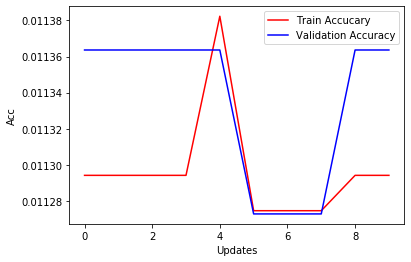

In [11]:
from sklearn.metrics import accuracy_score

# setting hyperparameters and gettings epoch sizes
batch_size =  1000
num_epochs = 10
num_samples_train = X_train_enc.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = X_valid_enc.shape[0]
num_batches_valid = num_samples_valid // batch_size

# setting up lists for handling loss/accuracy
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
losses = []

get_slice = lambda i, size: range(i * size, (i + 1) * size)


for epoch in range(num_epochs):
    # Forward -> Backprob -> Update params
    ## Train
    cur_loss = 0
    net.train()
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        x_batch = get_variable(Variable(torch.from_numpy(X_train_enc[slce])))
        output = net(x_batch)
        
        # compute gradients given loss
        target_batch = get_variable(Variable(torch.from_numpy(y_train[slce]).long()))
        batch_loss = criterion(output, target_batch)
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        
        cur_loss += batch_loss   
    losses.append(cur_loss / batch_size)

    net.eval()
    ### Evaluate training
    train_preds, train_targs = [], []
    for i in range(num_batches_train):
        slce = get_slice(i, batch_size)
        x_batch = get_variable(Variable(torch.from_numpy(X_train_enc[slce])))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        
        train_targs += list(y_train[slce])
        train_preds += list(preds.data.numpy())
    
    ### Evaluate validation
    val_preds, val_targs = [], []
    for i in range(num_batches_valid):
        slce = get_slice(i, batch_size)
        x_batch = get_variable(Variable(torch.from_numpy(X_valid_enc[slce])))
        
        output = net(x_batch)
        preds = torch.max(output, 1)[1]
        val_preds += list(preds.data.numpy())
        val_targs += list(y_valid[slce])

    train_acc_cur = accuracy_score(train_targs, train_preds)
    valid_acc_cur = accuracy_score(val_targs, val_preds)
    
    train_acc.append(train_acc_cur)
    valid_acc.append(valid_acc_cur)
    
    if epoch % 4 == 0:
        print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                epoch+1, losses[-1], train_acc_cur, valid_acc_cur))

epoch = np.arange(len(train_acc))
plt.figure()
plt.plot(epoch, train_loss, 'r', label='Training loss',)
plt.plot(epoch, valid_loss, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('NLL')

plt.figure()
plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
plt.legend(['Train Accucary','Validation Accuracy'])
plt.xlabel('Updates'), plt.ylabel('Acc')

7
0


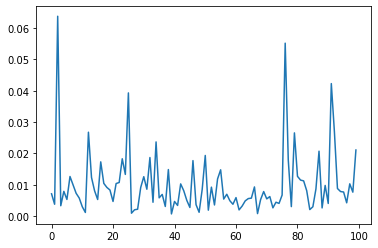

In [8]:
output = net(get_variable(Variable(torch.from_numpy(X_valid_enc))))
plt.plot(output[10].detach().numpy())
print(np.argmax(X_valid_enc[0]))
print(y_train[10])